In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Problem Statement

HR analytics is revolutionizing the way human resources departments operate, leading to higher efficiency and better results overall. Human resources have been using analytics for years.

However, the collection, processing, and analysis of data have been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#About


Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

employee_id..	Unique ID for employee
department...	Department of employee
region...	Region of employment (unordered)
education...	Education Level
gender...	Gender of Employee
recruitment_channel..	Channel of recruitment for employee
no_of_trainings...	no of other trainings completed in previous year on soft skills, technical skills etc.
age..	Age of Employee
previous_year_rating...	Employee Rating for the previous year
length_of_service..	Length of service in years
KPIs_met >80%..	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?..	if awards won during previous year then 1 else 0
avg_training_score..	Average score in current training evaluations
is_promoted	(Target).. Recommended for promotion

Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

Evaluation Metric

The evaluation metric for this competition is F1 Score.




In [ ]:
train_HR = pd.read_csv('train_HR.csv')
train_HR.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# test data
test_HR = pd.read_csv('test_HR.csv')
test_HR.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
# shape of train and test data
train_HR.shape,test_HR.shape

((54808, 14), (23490, 13))

In [ ]:
# data type of columns and overview 
train_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
test_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
# we will focus on train data for preprocessing and subsequently apply of test data
#how is the target column distributed
train_HR.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

The target column is imbalanced and needs to be taken care of prior model building

In [ ]:
# look at missing values
train_HR.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# % missing values in education and rating
print('% Missing values in Education',(train_HR.education.isnull().sum()/train_HR.shape[0])*100)
print('% Missing values in previous_year_rating',(train_HR.previous_year_rating.isnull().sum()/train_HR.shape[0])*100)

% Missing values in Education 4.395343745438622
% Missing values in previous_year_rating 7.524448985549554


The columns education and prev year rating has missing values 

In [ ]:
# looking at education column closely
train_HR.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
train_HR.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
#we will use mode of the feature to impute missing columns
train_HR['education'].fillna("Bachelor's'",inplace=True)

In [ ]:
# looking at prev year rating
train_HR['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

The data seems minor skew to right . We will use median for imputing missing values

In [ ]:
#using median value of prev year rating to fillna
rating_imp = train_HR['previous_year_rating'].median()
train_HR['previous_year_rating'].fillna(rating_imp,inplace=True)

In [ ]:
train_HR.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

No missing values in traing dataset

In [ ]:
train_HR.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
# lets look at numeric attributes 
train_HR['no_of_trainings'].describe()

count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64

Min and Max val of 1 and 10 respectively. The data is skewed to right

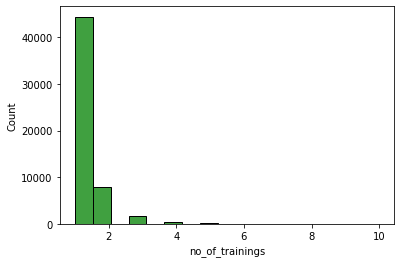

In [ ]:
#histogram of train_HR['no_of_trainings']
sns.histplot(train_HR['no_of_trainings'],color='green')
plt.show()

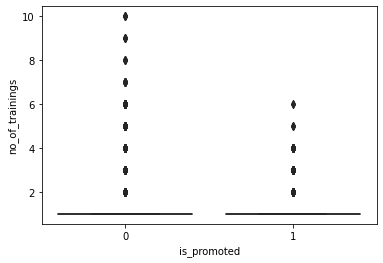

In [ ]:
sns.boxplot(y=train_HR['no_of_trainings'],x=train_HR['is_promoted'],color='green')
plt.show()

In [ ]:
#lets look at extreme values distribution
for i in range(4,11):
  print(i,train_HR[train_HR['no_of_trainings']==i].shape[0])

4 468
5 128
6 44
7 12
8 5
9 5
10 5


The most of training are 1 and a few cases are beyond 1 indicative of outlier. We will out these values in bins (sort of discrete values)

In [ ]:
#using cut to discretize
train_HR['no_trg_bin'] = pd.cut(train_HR['no_of_trainings'],bins=[0,1,2,10], precision=0,labels=['One','Two,','More_than_2'])
train_HR.drop(columns='no_of_trainings',axis=1,inplace=True)
train_HR.head()

,employee_id,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,no_trg_bin
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,35,5.0,8,1,0,49,0,One
1,65141,Operations,region_22,Bachelor's,m,other,30,5.0,4,0,0,60,0,One
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,34,3.0,7,0,0,50,0,One
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,39,1.0,10,0,0,50,0,"Two,"
4,48945,Technology,region_26,Bachelor's,m,other,45,3.0,2,0,0,73,0,One


In [ ]:
train_HR['no_trg_bin'].value_counts()

One            44378
Two,            7987
More_than_2     2443
Name: no_trg_bin, dtype: int64

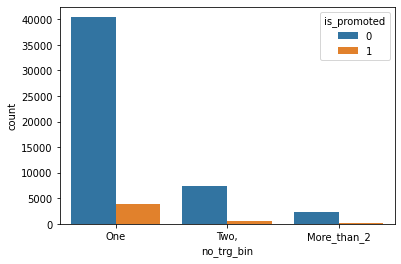

In [ ]:
# look at the distribution with target col
sns.countplot(hue=train_HR['is_promoted'],x=train_HR['no_trg_bin'])
plt.show()

The maximum number of people have done only one trg . 

In [ ]:
#checking the assiciation between this attribite and target variabe
pd.crosstab(train_HR['no_trg_bin'],train_HR['is_promoted'])

is_promoted,0,1
no_trg_bin,,
One,40468,3910
"Two,",7382,605
More_than_2,2290,153


In [ ]:
from scipy.stats import chi2_contingency

table = np.array([[40468,3910],[7382,605],[2290,153]])
chi2_contingency(table)

(29.94444420451088,
 3.1451876317381095e-07,
 2,
 array([[40598.32360239,  3779.67639761],
        [ 7306.74682528,   680.25317472],
        [ 2234.92957233,   208.07042767]]))

Since p value is small there is an association at 95% confidence(reject Ho)

In [ ]:
#test set processing
#missing value imputing
test_HR['education'].fillna("Bachelor's'",inplace=True)
test_HR['previous_year_rating'].fillna(rating_imp,inplace=True)

In [ ]:
#pre-processing no of training attribute
test_HR['no_trg_bin'] = pd.cut(test_HR['no_of_trainings'],bins=[0,1,2,10], precision=0,labels=['One','Two,','More_than_2'])
test_HR.drop(columns='no_of_trainings',axis=1,inplace=True)

**Examining Age attribute**

In [ ]:
train_HR['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

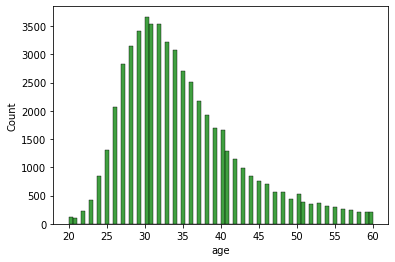

In [ ]:
# lets plot histogram
sns.histplot(train_HR['age'],color='green')
plt.show()

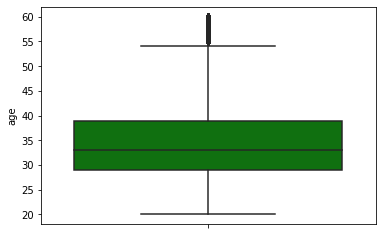

In [ ]:
sns.boxplot(y=train_HR['age'],color='green')
plt.show()

The data is right skewed . Taking a log transformation can improve normality

In [ ]:
train_HR['age']= np.log(train_HR['age'])

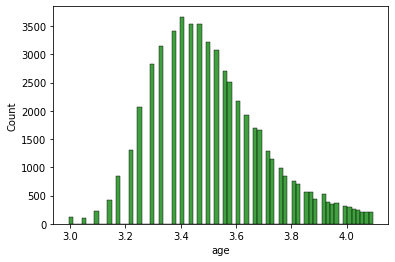

In [ ]:
sns.histplot(train_HR['age'],color='green')
plt.show()

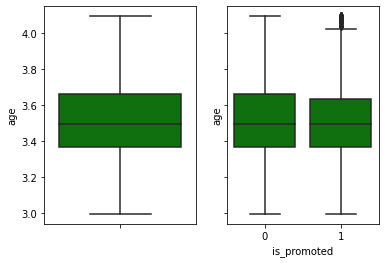

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.boxplot(y=train_HR['age'],color='green',ax=ax1)
sns.boxplot(y=train_HR['age'],x=train_HR['is_promoted'],color='green',ax=ax2)
plt.show()

The age attribute looks ok now

# Binning the age column

df['age'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49], 
                    labels=['20 to 30', '30 to 40', '40+']) 
# Changing datatype 'category' to 'object'

df['age'] = df['age'].astype('object')

In [ ]:
# applying log transformation of test data
test_HR['age']= np.log(test_HR['age'])

**Examining Previous year rating attribute**

In [ ]:
train_HR['previous_year_rating'].describe()

count    54808.000000
mean         3.304481
std          1.214770
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

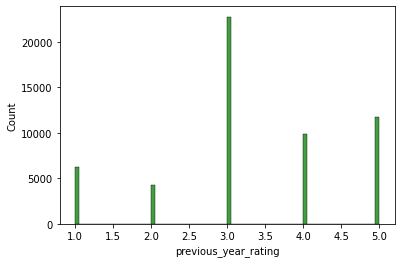

In [ ]:
# lets plot histogram of prev year rating
sns.histplot(train_HR['previous_year_rating'],color='green')
plt.show()

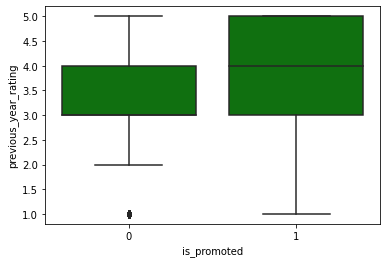

In [ ]:
sns.boxplot(y=train_HR['previous_year_rating'],x=train_HR['is_promoted'],color='green')
plt.show()

In [ ]:
train_HR[train_HR['previous_year_rating']==1].shape[0]

6223

previous year rating is discrete data. Mean value is 3 . Not much of skew in the data as mean and median are more or less equal.Some outliers at low rating of 1. The mean value of prev year rating for people promoted is higher than those not promoted.

**Examining length_of_service**

In [ ]:
train_HR['length_of_service'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

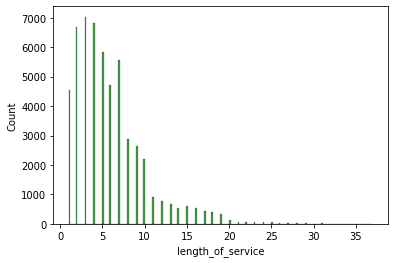

In [ ]:
# lets plot histogram of prev year rating
sns.histplot(train_HR['length_of_service'],color='green')
plt.show()

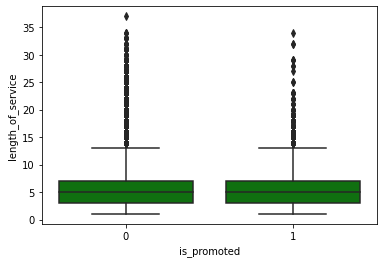

In [ ]:
sns.boxplot(y=train_HR['length_of_service'],x=train_HR['is_promoted'],color='green')
plt.show()

There are some extreme values on the higher side. Average length of service is around 5 years both for promoted and not promoted. 
We can use z scores to remove outliers or we can try two iterations with and without outlier and check model evaluation . 

In [ ]:
# using 1.5 IQR as outlier detection(we will use as separate iteration)
#q75, q25 = np.percentile(train_HR['length_of_service'], [75,25])
#iqr = q75 - q25
#upper = q75+(1.5*iqr)
#train_HR = train_HR[train_HR['length_of_service']<upper]
#sns.boxplot(y=train_HR['length_of_service'],x=train_HR['is_promoted'],color='green')
#plt.show()
#test_HR = test_HR[test_HR['length_of_service']<upper]"""

*Examining KPIs_met >80%*

In [ ]:
train_HR['KPIs_met >80%'].unique()

array([1, 0])

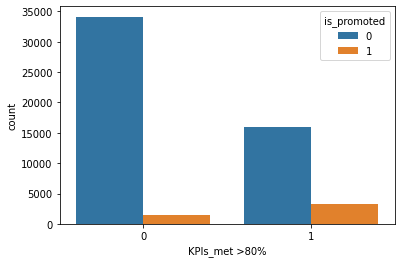

In [ ]:
sns.countplot(train_HR['KPIs_met >80%'],hue=train_HR['is_promoted'])
plt.show()


Most of data pertains to KPI_met>80% True. The impact of this attribute on promotion is marginal for people who got promoted.

*Examining 'awards_won?' column*

In [ ]:
train_HR['awards_won?'].unique()

array([0, 1])

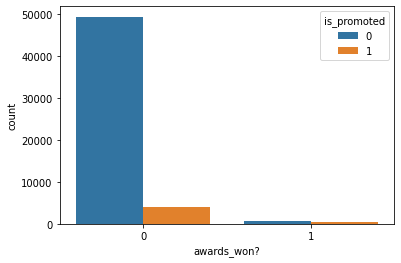

In [ ]:
sns.countplot(train_HR['awards_won?'],hue=train_HR['is_promoted'])
plt.show()

In [ ]:
train_HR[train_HR['awards_won?']==0].shape[0]

53538

In [ ]:
train_HR[train_HR['awards_won?']==1].shape[0]

1270

Most of the people have won an award. The data seems has very less info related to this attribute for promotion. We can drop this column

In [ ]:
#dropping awards won column from train and test data
train_HR.drop('awards_won?',axis=1,inplace=True)
test_HR.drop('awards_won?',axis=1,inplace=True)

In [ ]:
train_HR.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'avg_training_score',
       'is_promoted', 'no_trg_bin'],
      dtype='object')

In [ ]:
#dropping awards won column from train and test data
train_HR.drop('employee_id',axis=1,inplace=True)
test_HR.drop('employee_id',axis=1,inplace=True)

**Examining Department column**

In [ ]:
train_HR.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
#lets convert the department to Numeric 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_HR['department'] = le.fit_transform(train_HR['department'])
test_HR['department'] = le.transform(test_HR['department'])

**Examing region column**

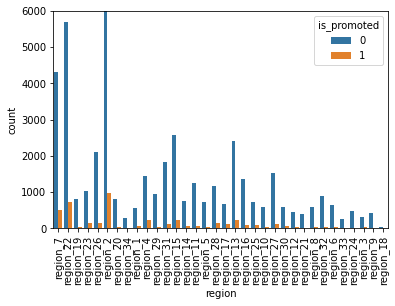

In [ ]:
sns.countplot(train_HR['region'],hue=train_HR['is_promoted'])
plt.ylim(0,6000)
plt.xticks(rotation=90)
plt.show()

Most of employees in the dataset are from region2,followed by 22 and 7. No major association is spotted between region and promotion. We shall check power of this feature during feature selection

In [ ]:
#converting to numeric data
train_HR['region'] = le.fit_transform(train_HR['region'])
test_HR['region'] = le.transform(test_HR['region'])

**Examining Gender column**

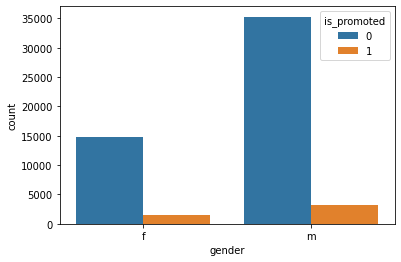

In [ ]:
sns.countplot(train_HR['gender'],hue=train_HR['is_promoted'])
plt.show()

The dataset has more male population. However the distribution seems to have no major strong association with promotion

In [ ]:
#converting the gender to numeric
train_HR['gender'] = le.fit_transform(train_HR['gender'])
test_HR['gender'] = le.transform(test_HR['gender'])

**Examining Education Column**

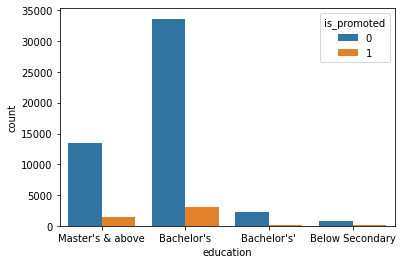

In [ ]:
sns.countplot(train_HR['education'],hue=train_HR['is_promoted'])
plt.show()

In [ ]:
train_HR['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Bachelor's'          2409
Below Secondary       805
Name: education, dtype: int64

In [ ]:
#combining both Bachelors cat to one
train_HR['education'] = train_HR['education'].replace({"Bachelor's'":"Bachelor's"})
test_HR['education'] = test_HR['education'].replace({"Bachelor's'":"Bachelor's"})

In [ ]:
#converting to numeric
train_HR['education'] = le.fit_transform(train_HR['education'])
test_HR['education'] = le.transform(test_HR['education'])


**Examining Regruitment Channel column**

In [ ]:
train_HR['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

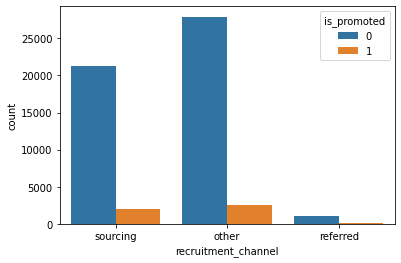

In [ ]:
sns.countplot(train_HR['recruitment_channel'],hue=train_HR['is_promoted'])
plt.show()

Most of individuals belong to other class. Promotion levels of referred indviduals seems low

In [ ]:
#converting to numeric
train_HR['recruitment_channel'] = le.fit_transform(train_HR['recruitment_channel'])
test_HR['recruitment_channel'] = le.transform(test_HR['recruitment_channel'])

In [ ]:
#converting trag_cat_bin to numeric
train_HR['no_trg_bin'] = le.fit_transform(train_HR['no_trg_bin'])
test_HR['no_trg_bin'] = le.transform(test_HR['no_trg_bin'])

In [ ]:
train_HR.head()

,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted,no_trg_bin
0,7,31,2,0,2,3.555348,5.0,8,1,49,0,1
1,4,14,0,1,0,3.401197,5.0,4,0,60,0,1
2,7,10,0,1,2,3.526361,3.0,7,0,50,0,1
3,7,15,0,1,0,3.663562,1.0,10,0,50,0,2
4,8,18,0,1,0,3.806662,3.0,2,0,73,0,1


All attributes have been converted to numeric

**Using Boruta for feature selection**

In [ ]:
!pip install Boruta

     |████████████████████████████████| 61kB 2.9MB/s 


In [ ]:
#assigning and splitting train_HR into train and test 
X = train_HR.drop('is_promoted',axis=1)
y = train_HR['is_promoted']

In [ ]:
#we will use test_HR for final validation
#splitting training set into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**Feature Selection Using Boruta**

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
X_train_boruta = np.array(X_train)
y_train_boruta = np.array(y_train)

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=0, random_state=1)   # initialize the boruta selector
boruta_selector.fit(X_train_boruta,y_train_boruta)       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=74, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F87175F2CA8,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='au

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
#visualising selected columns
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,department,1
1,region,1
5,age,1
6,previous_year_rating,1
7,length_of_service,1
8,KPIs_met >80%,1
9,avg_training_score,1
2,education,2
10,no_trg_bin,3
3,gender,4


In [ ]:
#lets shortlist selected columns
selected_features = ['department', 'region', 'education', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%','avg_training_score']

**Base Model** with all features and using Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # import the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#evaluate the model
from sklearn import metrics
print(metrics.f1_score(y_test,rfc.predict(X_test)))

0.428923582580115


**Model Iteration for improving the score**

Using SMOTE to address imbalance in data

In [ ]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, ratio = 1.0)   # again we are eqalizing both the classes
# fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
np.unique(y_train, return_counts=True) #the count of promoted and not promoted equalised

(array([0, 1]), array([40086, 40086]))

In [ ]:
X_train = pd.DataFrame(X_train,columns=[X.columns])


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}
rf = RandomForestClassifier(random_state = 42)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
X_important_train = X_train[selected_features]
grid_search.fit(X_important_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 34.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 15, 'n_estimators': 1000}

In [ ]:
X_important_test = X_test[selected_features]
metrics.f1_score(y_test, grid_search.predict(X_important_test))

0.38154733301297455

In [ ]:
#we inadvertantly dropped id from test data
#we will temporarily tackle this
result_df= pd.read_csv('test_HR.csv')
result_df = result_df[['employee_id']]

In [ ]:
#use model for prediction on test set
test_HR = test_HR[selected_features]
y_pred = grid_search.predict(test_HR)

In [ ]:
result_df['is_promoted'] = pd.Series(y_pred)
result_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:
from google.colab import files
result_df.to_csv('HR_Analytics.csv',index=False)
files.download('HR_Analytics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The above code got 0.39 score at Analytics Vidhya (rank 2407 out of 3191)

**Using Gradient Boosting**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=3) 
cv.fit(X_important_train, y_train)

print_results(cv)

In [ ]:
print(cv.best_estimator_)

In [ ]:
cv.best_score_

In [ ]:
metrics.f1_score(y_test,cv.predict(X_important_test))

In [ ]:
result_df_2= pd.read_csv('test_HR.csv')
result_df_2 = result_df[['employee_id']]

In [ ]:
#use model for prediction on test set
y_pred_2 = cv.predict(test_HR)

In [ ]:
result_df_2['is_promoted'] = pd.Series(y_pred_2)
result_df_2.head()

In [ ]:
from google.colab import files
result_df_2.to_csv('HR_Analytics_2.csv',index=False)
files.download('HR_Analytics_2.csv')